<a href="https://colab.research.google.com/github/Enilsonn/my_own/blob/main/gera%C3%A7%C3%A3o_automatica_de_numeros_com_reflect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.Pad(10, padding_mode = 'reflect'), #zero paddind
    transforms.ToTensor()
])
train = datasets.MNIST(root = '.', train = True, download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(train, batch_size = 256)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5060187.67it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 132422.60it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 241566.44it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11018235.26it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
class Gerador(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(100, 32)
    self.dense1 = nn.Linear(32, 128)
    self.dense2 = nn.Linear(128, 512)
    self.dense3 = nn.Linear(512, 2304)

    self.dropout = nn.Dropout(0.3)

  def forward(self,X):
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = torch.tanh(self.dense3(X))
    X = X.view(X.shape[0], 48, 48)
    return X

class Discriminador(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(2304, 512)
    self.dense1 = nn.Linear(512, 128)
    self.dense2 = nn.Linear(128,32)
    self.dense3 = nn.Linear(32, 1)

    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = X.view(X.shape[0], 48*48)

    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = self.dense3(X) # a funcao de ativacao eh feita for da classe pelum criterion especifico
    return X

In [4]:
G = Gerador()
D = Discriminador()

In [5]:
G_optimizer = optim.Adam(G.parameters(), lr = 0.002)
D_optimizer = optim.Adam(D.parameters(), lr = 0.002)

In [6]:
criterion = nn.BCEWithLogitsLoss()
# combina uma camada de sigmiod com uma cama de binarycross entropy loss, ou seja: ja aplica uma funcao de ativacao
# logits = o perceptron n aplicou uma funcao de ativacao

In [7]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [8]:
G.to(device)

Gerador(
  (dense0): Linear(in_features=100, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=128, bias=True)
  (dense2): Linear(in_features=128, out_features=512, bias=True)
  (dense3): Linear(in_features=512, out_features=2304, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [9]:
D.to(device)

Discriminador(
  (dense0): Linear(in_features=2304, out_features=512, bias=True)
  (dense1): Linear(in_features=512, out_features=128, bias=True)
  (dense2): Linear(in_features=128, out_features=32, bias=True)
  (dense3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Epoca 001 finalizada: custo discriminador 0.88637 - custo gerador 4.02394        


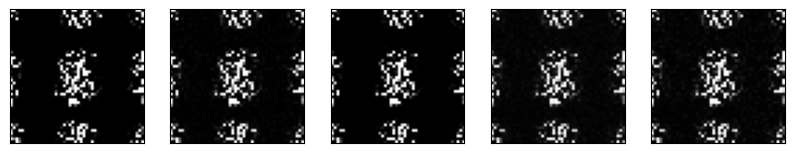

Epoca 002 finalizada: custo discriminador 0.45360 - custo gerador 10.76491        


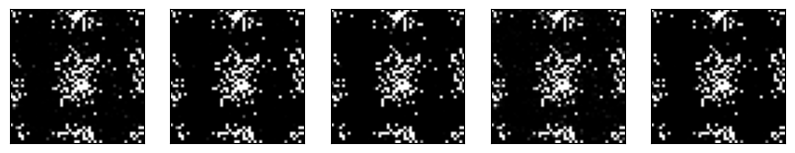

Epoca 003 finalizada: custo discriminador 0.34014 - custo gerador 16.13509        


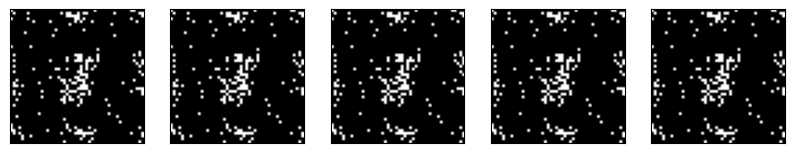

Epoca 004 finalizada: custo discriminador 0.33214 - custo gerador 23.80139        


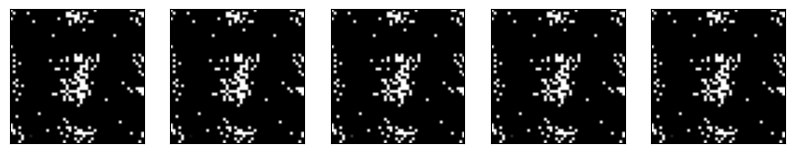

Epoca 005 finalizada: custo discriminador 0.33148 - custo gerador 26.28048        


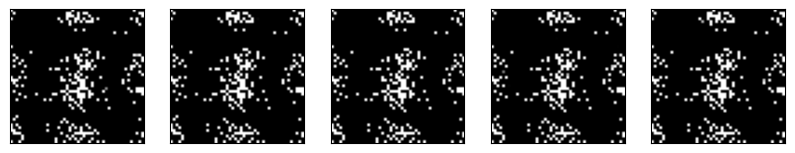

Epoca 006 finalizada: custo discriminador 0.33406 - custo gerador 18.45414        


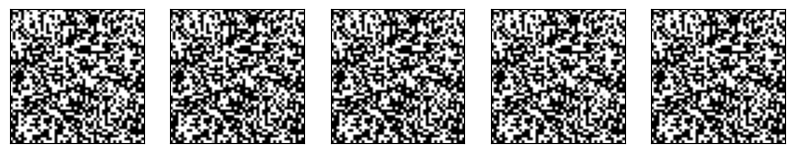

Epoca 007 finalizada: custo discriminador 0.33184 - custo gerador 17.99222        


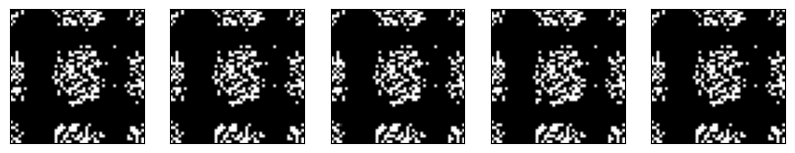

Epoca 008 finalizada: custo discriminador 0.33079 - custo gerador 22.02819        


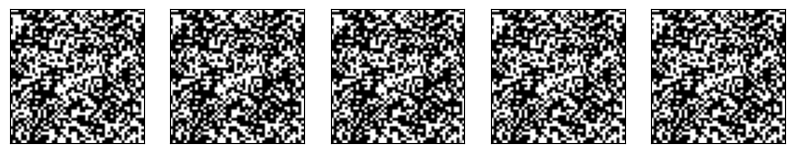

Epoca 009 finalizada: custo discriminador 0.33054 - custo gerador 20.67930        


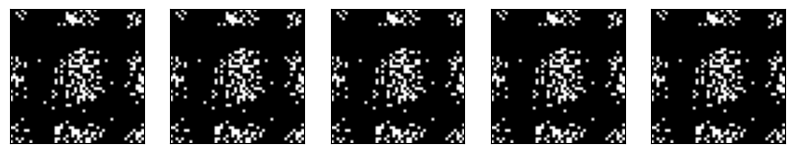

Epoca 010 finalizada: custo discriminador 0.33004 - custo gerador 26.06179        


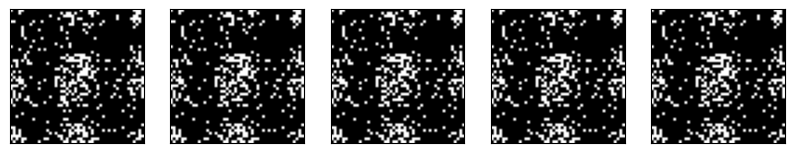

Epoca 011 finalizada: custo discriminador 0.32976 - custo gerador 23.43056        


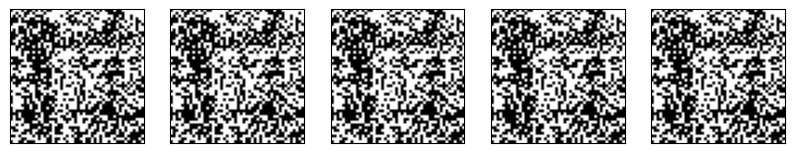

Epoca 012 finalizada: custo discriminador 0.32964 - custo gerador 24.58436        


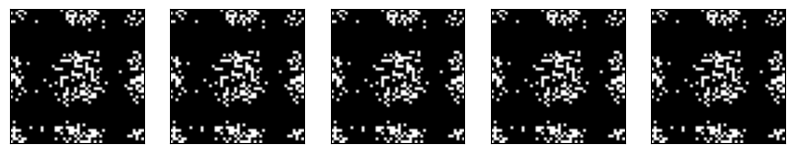

Epoca 013 finalizada: custo discriminador 0.32914 - custo gerador 22.62362        


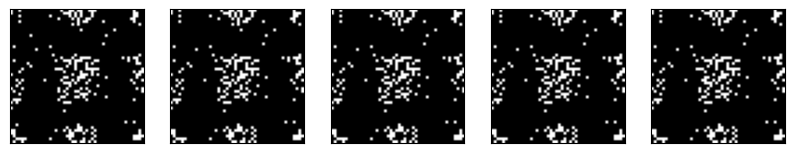

Epoca 014 finalizada: custo discriminador 0.32892 - custo gerador 26.60533        


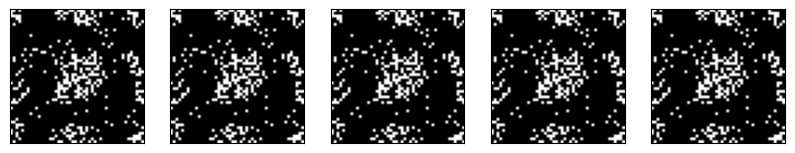

Epoca 015 finalizada: custo discriminador 0.32854 - custo gerador 31.50016        


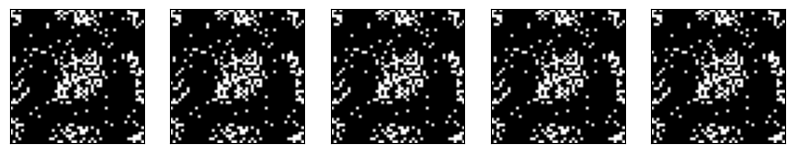

Epoca 016 finalizada: custo discriminador 0.32824 - custo gerador 30.98442        


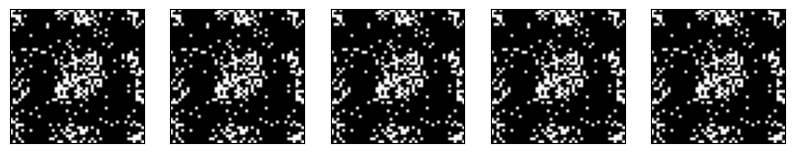

Epoca 017 finalizada: custo discriminador 0.32800 - custo gerador 28.62198        


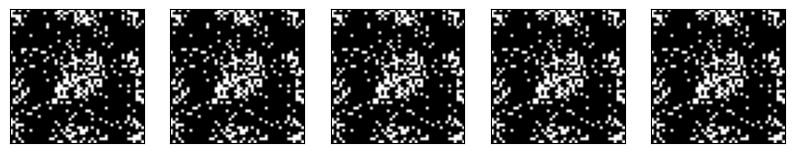

Epoca 018 finalizada: custo discriminador 0.32772 - custo gerador 26.64989        


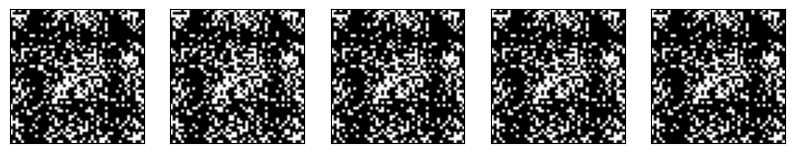

Epoca 019 finalizada: custo discriminador 0.32760 - custo gerador 25.01426        


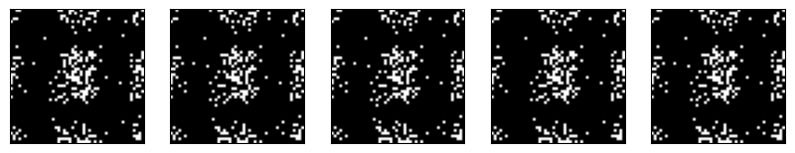

Epoca 020 finalizada: custo discriminador 0.32728 - custo gerador 25.31100        


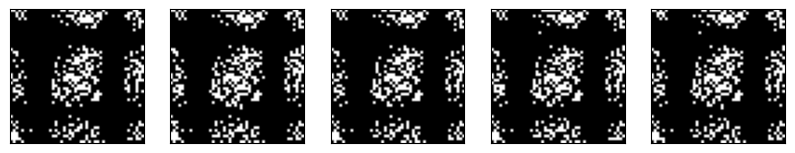

Epoca 021 finalizada: custo discriminador 0.32697 - custo gerador 24.08074        


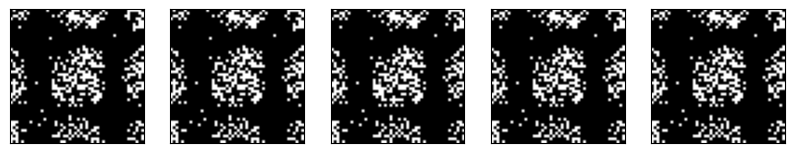

Epoca 022 finalizada: custo discriminador 0.32670 - custo gerador 26.08845        


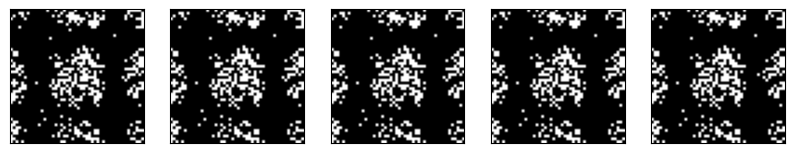

Epoca 023 finalizada: custo discriminador 0.32649 - custo gerador 23.52513        


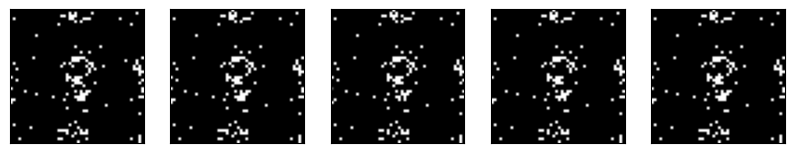

Epoca 024 finalizada: custo discriminador 0.32625 - custo gerador 24.09719        


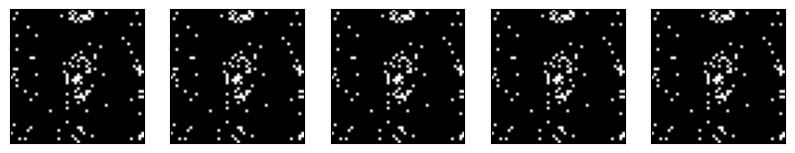

Epoca 025 finalizada: custo discriminador 0.32603 - custo gerador 24.72521        


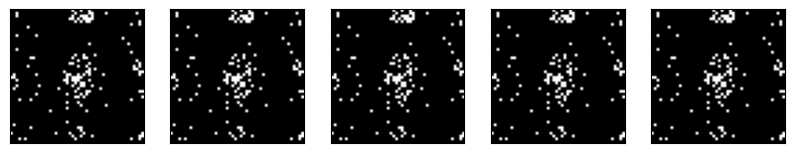

Epoca 026 finalizada: custo discriminador 0.32587 - custo gerador 23.26214        


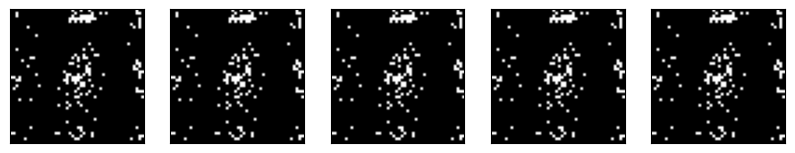

Epoca 027 finalizada: custo discriminador 0.32570 - custo gerador 24.46070        


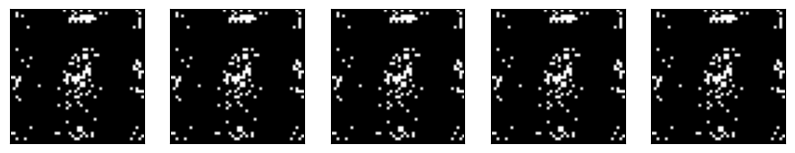

Epoca 028 finalizada: custo discriminador 0.32555 - custo gerador 25.36462        


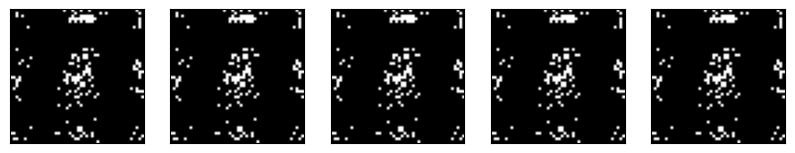

Epoca 029 finalizada: custo discriminador 0.32544 - custo gerador 24.46388        


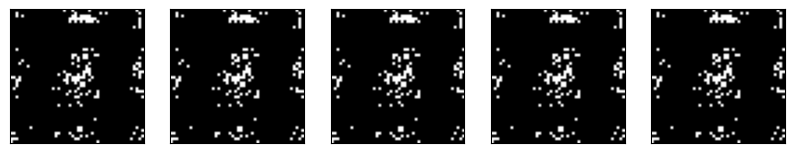

Epoca 030 finalizada: custo discriminador 0.32535 - custo gerador 20.23568        


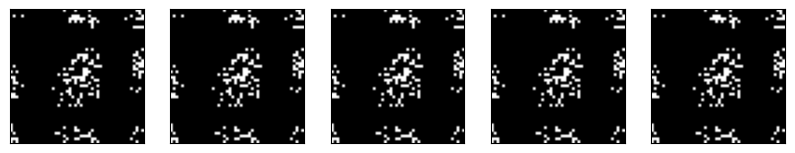

Epoca 031 finalizada: custo discriminador 0.32529 - custo gerador 19.48834        


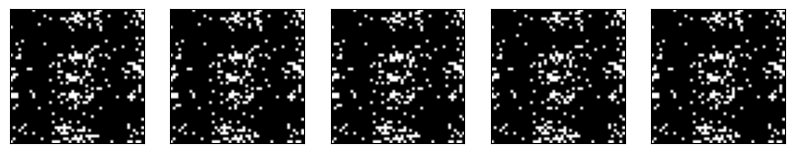

Epoca 032 finalizada: custo discriminador 0.32525 - custo gerador 21.85145        


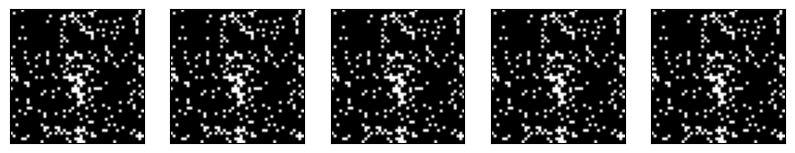

Epoca 033 finalizada: custo discriminador 0.32518 - custo gerador 25.24901        


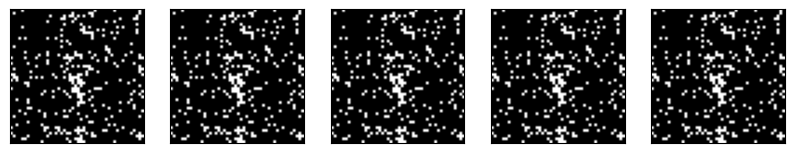

Epoca 034 finalizada: custo discriminador 0.32515 - custo gerador 26.80513        


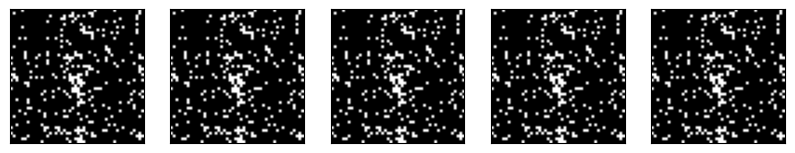

Epoca 035 finalizada: custo discriminador 0.32513 - custo gerador 25.00711        


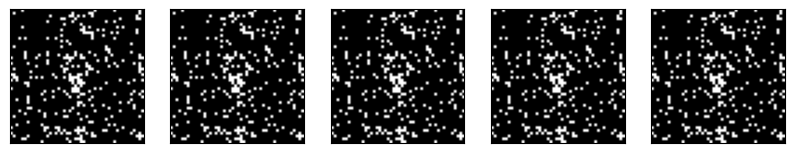

Epoca 036 finalizada: custo discriminador 0.32511 - custo gerador 23.76929        


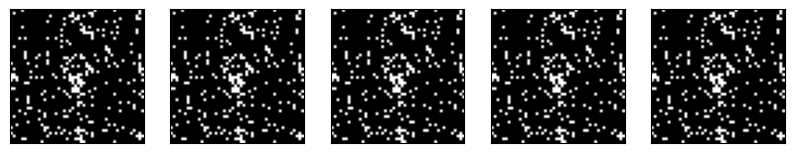

Epoca 037 finalizada: custo discriminador 0.65796 - custo gerador 16.22887        


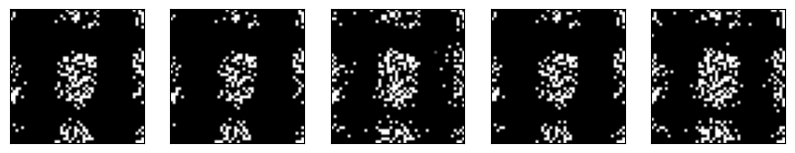

Epoca 038 finalizada: custo discriminador 0.33833 - custo gerador 20.76771        


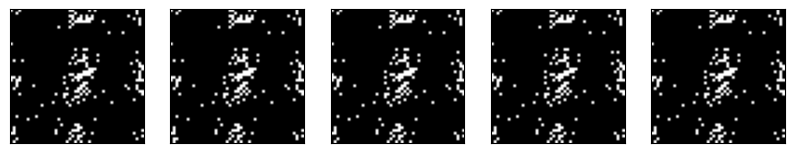

Epoca 039 finalizada: custo discriminador 0.33102 - custo gerador 20.39078        


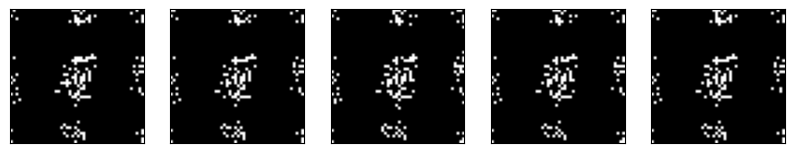

Epoca 040 finalizada: custo discriminador 0.32935 - custo gerador 21.82007        


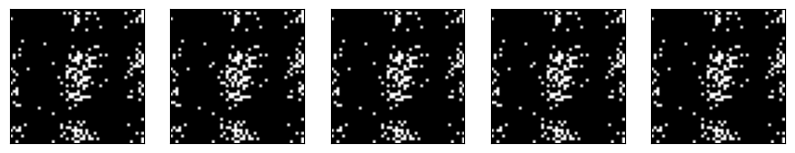

Epoca 041 finalizada: custo discriminador 0.32688 - custo gerador 24.39924        


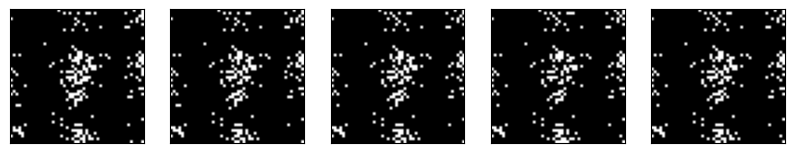

Epoca 042 finalizada: custo discriminador 0.32685 - custo gerador 23.15334        


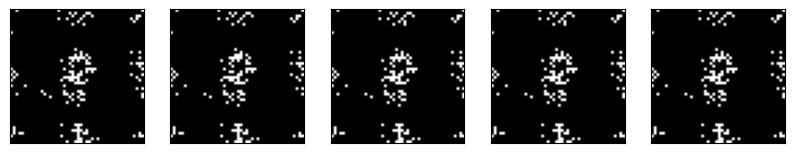

Epoca 043 finalizada: custo discriminador 0.32619 - custo gerador 25.52256        


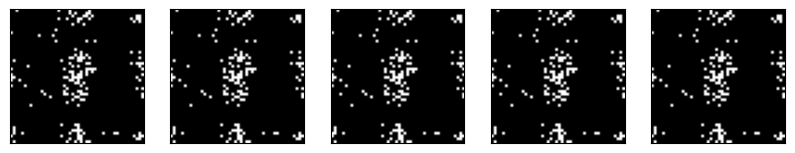

Epoca 044 finalizada: custo discriminador 0.32571 - custo gerador 26.15491        


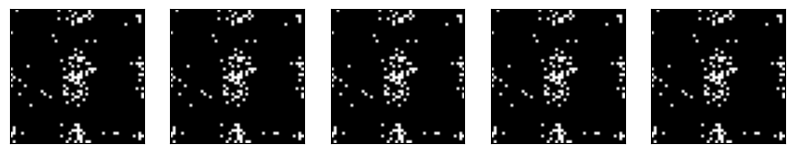

Epoca 045 finalizada: custo discriminador 0.32559 - custo gerador 24.41833        


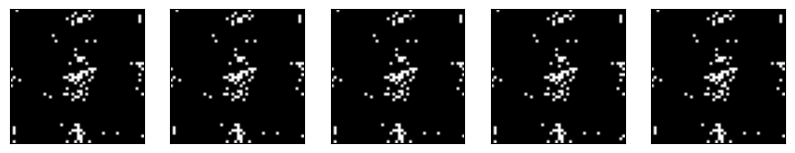

Epoca 046 finalizada: custo discriminador 0.32581 - custo gerador 21.78630        


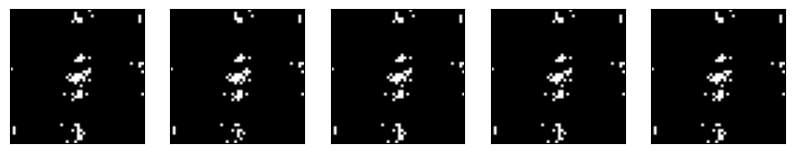

Epoca 047 finalizada: custo discriminador 0.32597 - custo gerador 21.27454        


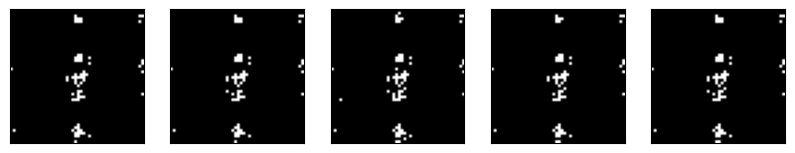

Epoca 048 finalizada: custo discriminador 0.32559 - custo gerador 22.26522        


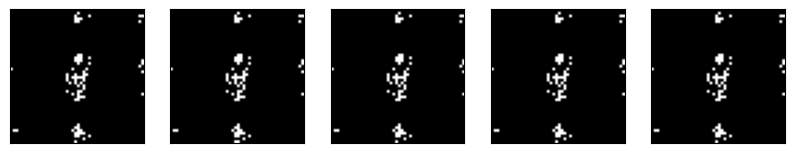

Epoca 049 finalizada: custo discriminador 0.32541 - custo gerador 23.11698        


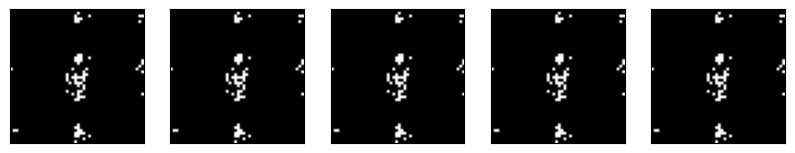

Epoca 050 finalizada: custo discriminador 0.32533 - custo gerador 23.58062        


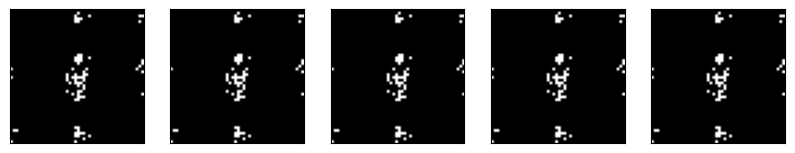

Epoca 051 finalizada: custo discriminador 0.32528 - custo gerador 23.84465        


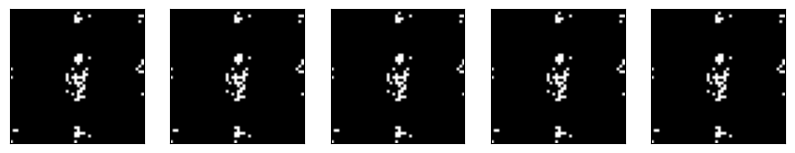

Epoca 052 finalizada: custo discriminador 0.32525 - custo gerador 24.76844        


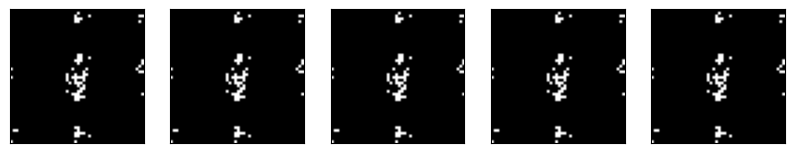

Epoca 053 finalizada: custo discriminador 0.32524 - custo gerador 24.62823        


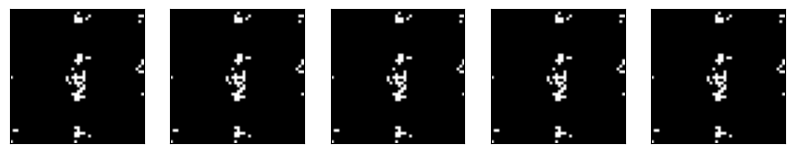

Epoca 054 finalizada: custo discriminador 0.32526 - custo gerador 25.81921        


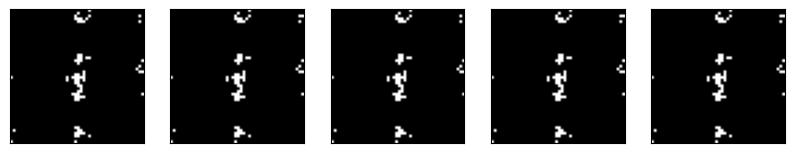

Epoca 055 finalizada: custo discriminador 0.32528 - custo gerador 23.78967        


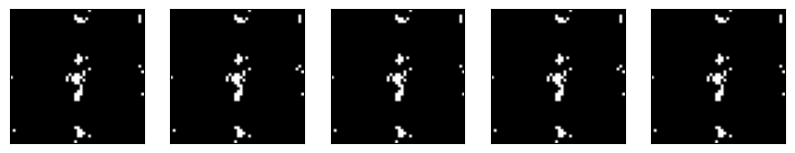

Epoca 056 finalizada: custo discriminador 0.32529 - custo gerador 24.12332        


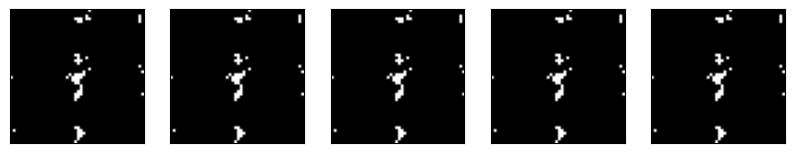

Epoca 057 finalizada: custo discriminador 0.32529 - custo gerador 24.75635        


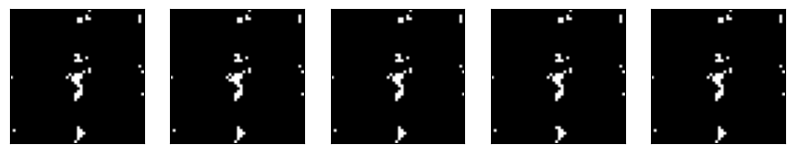

Epoca 058 finalizada: custo discriminador 0.32525 - custo gerador 26.77063        


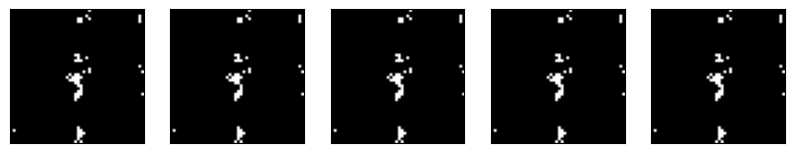

Epoca 059 finalizada: custo discriminador 0.32522 - custo gerador 27.88170        


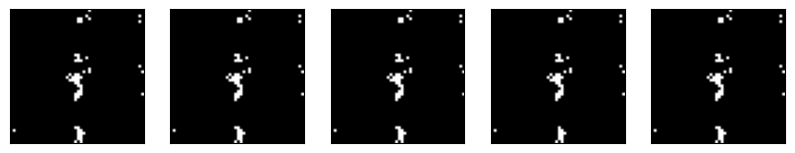

Epoca 060 finalizada: custo discriminador 0.32524 - custo gerador 28.64978        


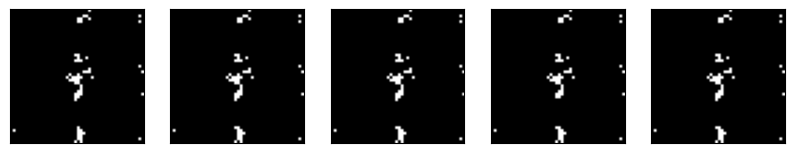

Epoca 061 finalizada: custo discriminador 0.32527 - custo gerador 31.31375        


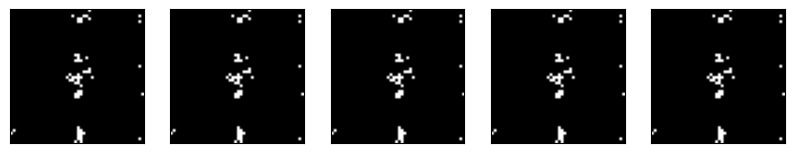

Epoca 062 finalizada: custo discriminador 0.32524 - custo gerador 31.67065        


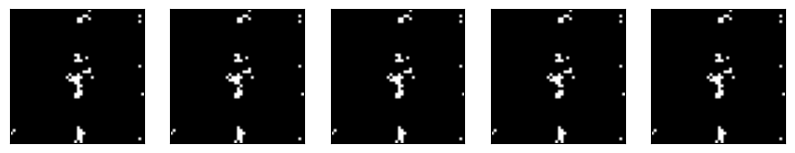

Epoca 063 finalizada: custo discriminador 0.32517 - custo gerador 30.09530        


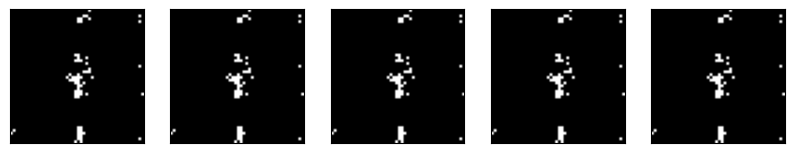

Epoca 064 finalizada: custo discriminador 0.32521 - custo gerador 33.44006        


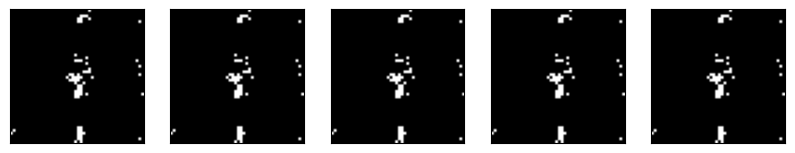

Epoca 065 finalizada: custo discriminador 0.32523 - custo gerador 29.86519        


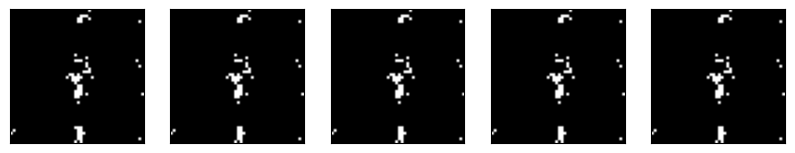

Epoca 066 finalizada: custo discriminador 0.32520 - custo gerador 37.08967        


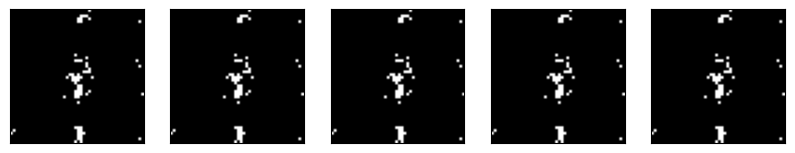

Epoca 067 finalizada: custo discriminador 0.32528 - custo gerador 34.78503        


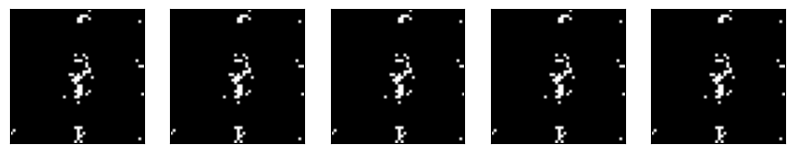

Epoca 068 finalizada: custo discriminador 0.32525 - custo gerador 31.63274        


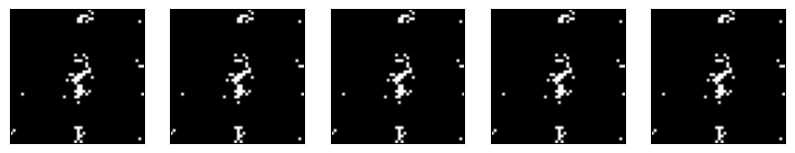

Epoca 069 finalizada: custo discriminador 0.32524 - custo gerador 28.57911        


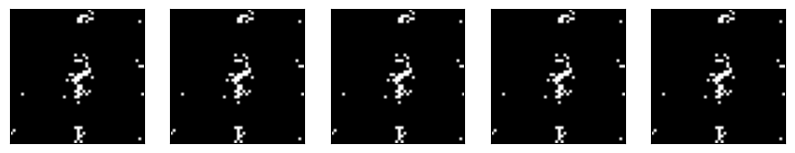

Epoca 070 finalizada: custo discriminador 0.32514 - custo gerador 30.22308        


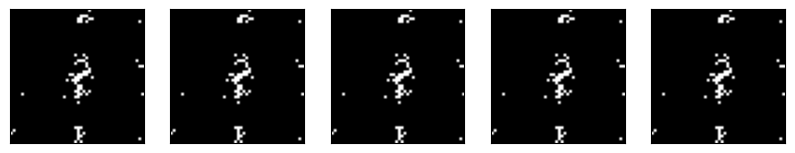

Epoca 071 finalizada: custo discriminador 0.32513 - custo gerador 33.69493        


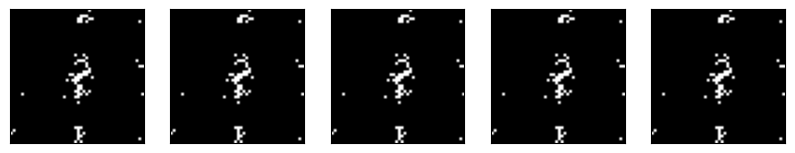

Epoca 072 finalizada: custo discriminador 0.32512 - custo gerador 30.77457        


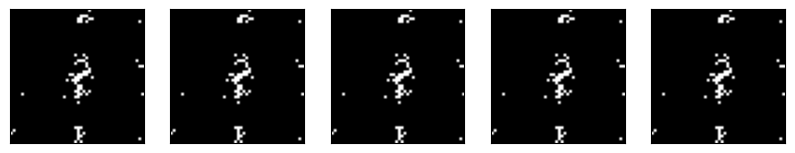

Epoca 073 finalizada: custo discriminador 0.32516 - custo gerador 44.87152        


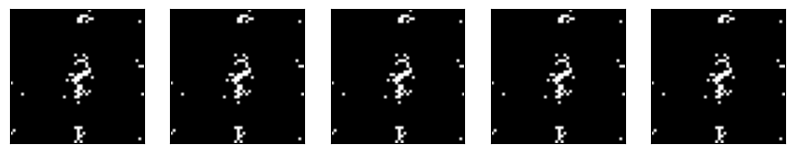

Epoca 074 finalizada: custo discriminador 0.32512 - custo gerador 37.98617        


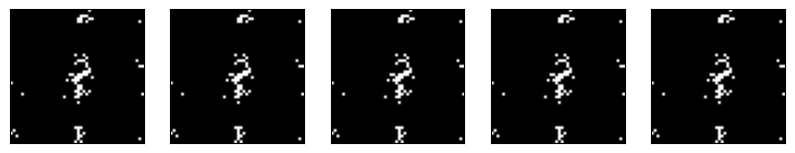

Epoca 075 finalizada: custo discriminador 0.32529 - custo gerador 54.37181        


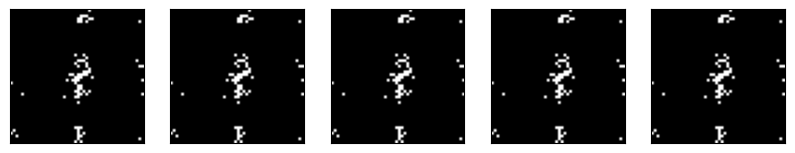

Epoca 076 finalizada: custo discriminador 0.32515 - custo gerador 42.93240        


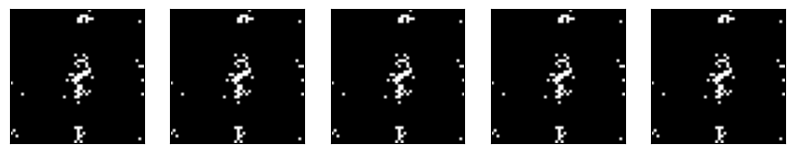

Epoca 077 finalizada: custo discriminador 0.32514 - custo gerador 45.29555        


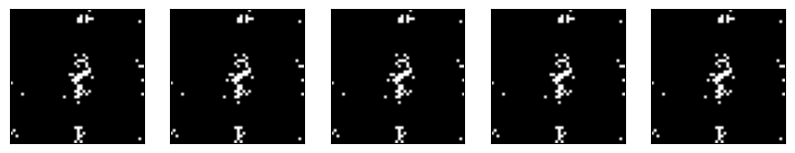

Epoca 078 finalizada: custo discriminador 0.32511 - custo gerador 38.48674        


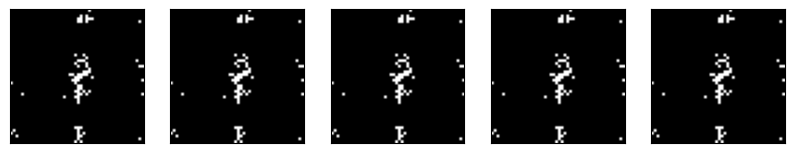

Epoca 079 finalizada: custo discriminador 0.32512 - custo gerador 43.16636        


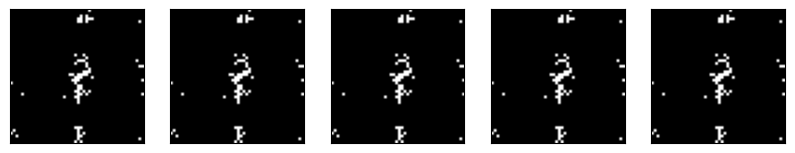

Epoca 080 finalizada: custo discriminador 0.32511 - custo gerador 41.50024        


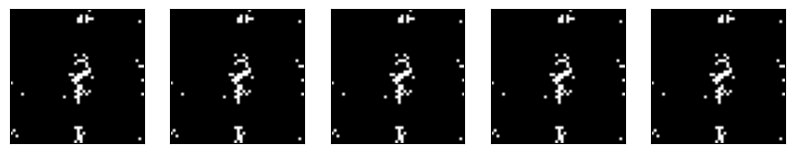

Epoca 081 finalizada: custo discriminador 0.32511 - custo gerador 43.92137        


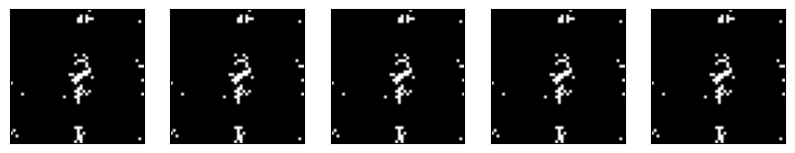

Epoca 082 finalizada: custo discriminador 0.32519 - custo gerador 50.33856        


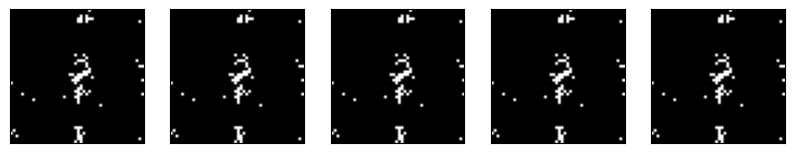

Epoca 083 finalizada: custo discriminador 0.32510 - custo gerador 38.43583        


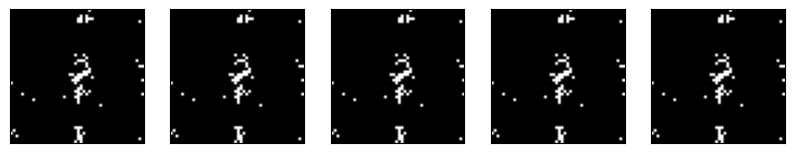

Epoca 084 finalizada: custo discriminador 0.32509 - custo gerador 38.04202        


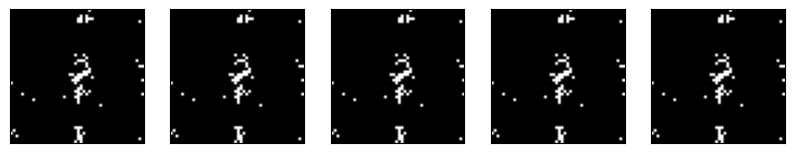

Epoca 085 finalizada: custo discriminador 0.32509 - custo gerador 40.48194        


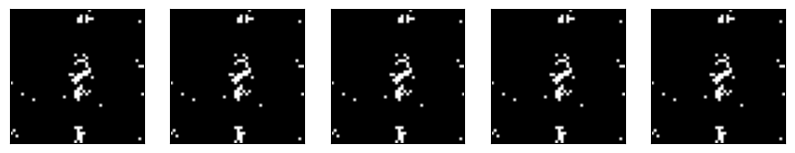

Epoca 086 finalizada: custo discriminador 0.42615 - custo gerador 19.55264        


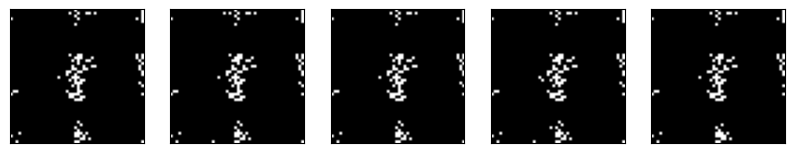

Epoca 087 finalizada: custo discriminador 0.32717 - custo gerador 16.70045        


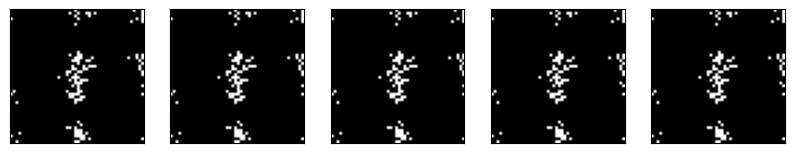

Epoca 088 finalizada: custo discriminador 0.32625 - custo gerador 17.21324        


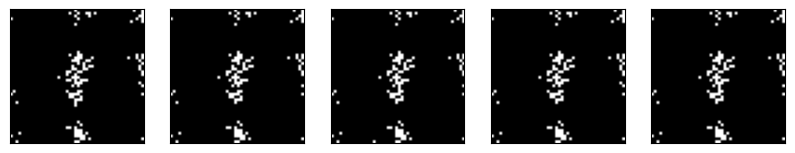

Epoca 089 finalizada: custo discriminador 0.32592 - custo gerador 17.95850        


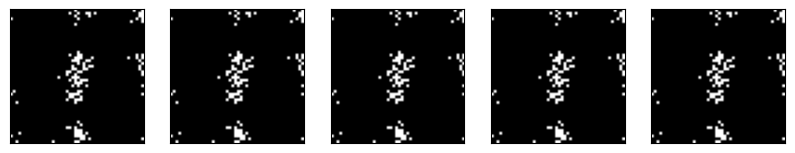

Epoca 090 finalizada: custo discriminador 0.32572 - custo gerador 18.16409        


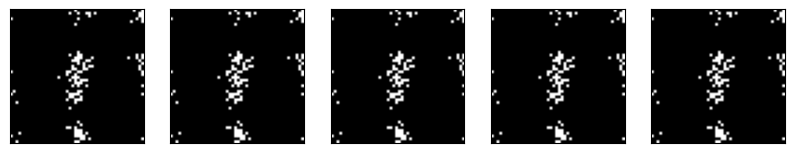

Epoca 091 finalizada: custo discriminador 0.32561 - custo gerador 18.81326        


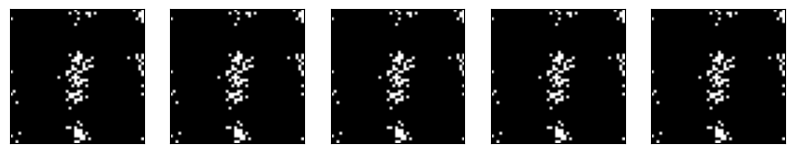

Epoca 092 finalizada: custo discriminador 0.32551 - custo gerador 19.59659        


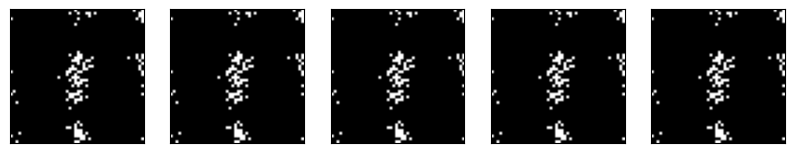

Epoca 093 finalizada: custo discriminador 0.32546 - custo gerador 20.37929        


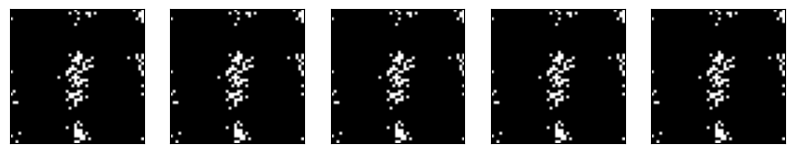

Epoca 094 finalizada: custo discriminador 0.32543 - custo gerador 20.71102        


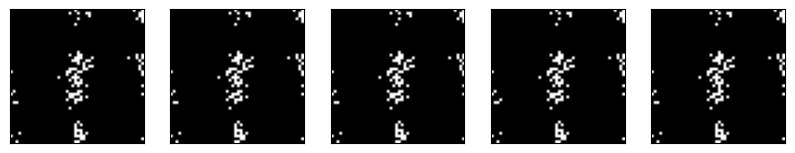

Epoca 095 finalizada: custo discriminador 0.33117 - custo gerador 18.05376        


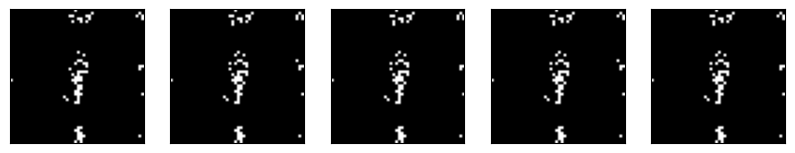

Epoca 096 finalizada: custo discriminador 0.32658 - custo gerador 16.30189        


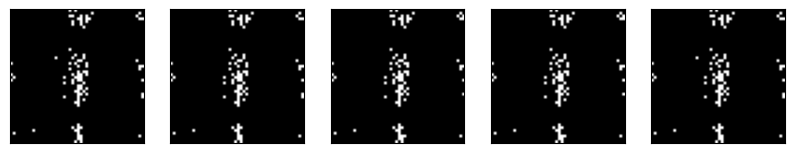

Epoca 097 finalizada: custo discriminador 0.32567 - custo gerador 19.23677        


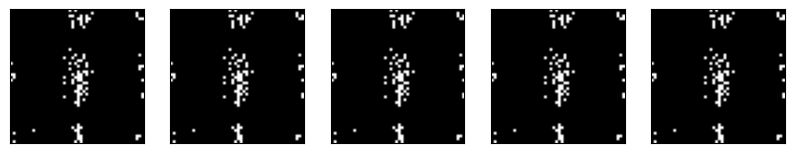

Epoca 098 finalizada: custo discriminador 0.32537 - custo gerador 19.69598        


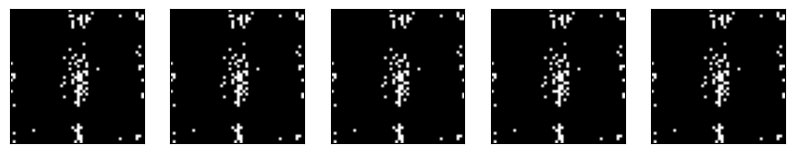

Epoca 099 finalizada: custo discriminador 0.32530 - custo gerador 20.71678        


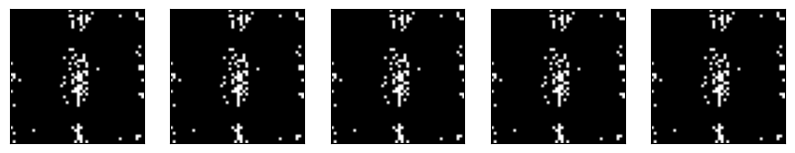

Epoca 100 finalizada: custo discriminador 0.32523 - custo gerador 20.40650        


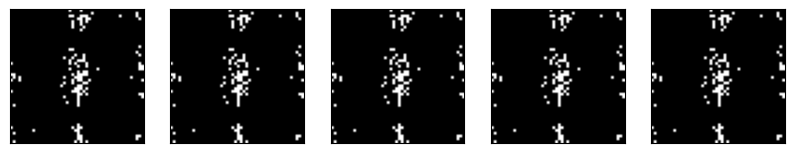

In [10]:
for epoch in range(100):
  D_running_loss = 0.
  G_running_loss = 0.

  for i, (imagens_reais, _) in enumerate(train_loader):
    batch_size = imagens_reais.size(0)
    imagens_reais = imagens_reais * 2 - 1 # imagens(0, 1) -> imagens(-1, 1)
    imagens_reais = imagens_reais.to(device)

    # treinamento do gerador
    G_optimizer.zero_grad()
    ruido = np.random.uniform(low = -1., high = 1., size = (batch_size, 100)) # size = (quantidade_de_vetores, tamanho_do_vetor)
    ruido = torch.from_numpy(ruido).float().to(device)

    imagens_falsas = G.forward(ruido)
    outputs_falsas = D.forward(imagens_falsas)

    labels_falsas = torch.ones(batch_size).to(device)

    G_loss = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)

    G_loss.backward()
    G_optimizer.step()

    G_running_loss += G_loss.item()

    # treinamento do discriminador
    D_optimizer.zero_grad()
    outputs_reais = D.forward(imagens_reais)

    labels_reais = (torch.ones(batch_size) * 0.9).to(device) # 0.9 eh um fator de suavisacao -- uma matriz cheia de 0.9

    D_loss_reais = criterion(outputs_reais.view(*labels_reais.shape), labels_reais)

    imagens_falsas = G.forward(ruido)
    outputs_falsas = D.forward(imagens_falsas)

    labels_falsas = torch.zeros(batch_size).to(device)

    D_loss_falsas = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)

    D_loss = D_loss_reais + D_loss_falsas

    D_loss.backward()
    D_optimizer.step()

    D_running_loss += D_loss.item()

    #print('\rEpoca: {:3d} - Loop {:3d} de {:3d}: custo discriminador {:03.5f} - custo gerador {:03.5f}'.format(epoch +1, i+1, len(train_loader), D_loss.item(), G_loss.item(), end = '\r'))

  D_running_loss /= len(train_loader)
  G_running_loss /= len(train_loader)
  print('Epoca {:03d} finalizada: custo discriminador {:03.5f} - custo gerador {:03.5f}        '.format(epoch + 1, D_running_loss, G_running_loss))

  fig, ax = plt.subplots(1, 5, figsize = (10,5))
  for i in range(5):
    ax[i].imshow(imagens_falsas.cpu().detach().numpy()[i].reshape(48,48), cmap = 'gray')
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
  plt.show()